In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import string
from PIL import Image

#LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Graphics
#import matplotlib.pyplot as plt
#import seaborn as sns
#KNeighbors
from sklearn.neighbors import NearestNeighbors
#Scalers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
#METRICS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import mean_squared_error
#RANDOM
import random as rd

#global link1
########################################################### FIRST TRY
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df_new = pd.DataFrame(zip(df['Full Name'],df['Brand'], df['Model'], df['Main Price'], df['Category']))
df_new.rename(columns = {0:'Full Name', 1:'Brand', 2:'Model', 3:'Main Price',4: 'Category'}, inplace = True)
df_new['Main Price'].value_counts(dropna = False)   # We either drop the Nans or we fill with the average
df_new['Main Price'].fillna(df_new['Main Price'].mean(), inplace = True) 
X = df_new[['Main Price']]          
distanceKNN = NearestNeighbors(n_neighbors=3).fit(X)
distanceKNN.kneighbors([[60000]], 3, return_distance = False)
#df[['Full Name', 'Main Price']].iloc[[148, 16, 57]]
categories = list(df['Category'].unique())
categories.insert(0,"ALL")

image = Image.open('BEEV_image.png')
st.image(image)
st.title("Let's check which EV cars would suit to you")
value_one = st.text_area("text box")

#Code below to check
if category_choosen!= "ALL":
    df['Category'] == category_choosen
else: category_choosen = "" # to check if we can filter the DF if category_choosen ==""
        
# st.write("similar unique words",dict2)
label1 = "please select the category of the car you would like"
category_choosen = st.selectbox(label1,categories)
st.write(category_choosen)
if st.button('Get info'):
  st.write(value_one)
  #  for i in range(1, 1000): #len(df_lyrics_final['Lyric'])):
   #   
    #    lyrics_comparator(punct(lyrics_one), punct(df_lyrics_final['Lyric'][i]))
     #   final_dict[i] = [max_similar,similar_w_unique, similar_w_not_unique]

  #  lyrics_report(punct(lyrics_one), punct(df_lyrics_final['Lyric'][dict_sum(final_dict)]))
   # st.write(df_lyrics_final.iloc[dict_sum(final_dict)][['Artist','Song']]) #veribal 
    #link1 = df_lyrics_final.iloc[dict_sum(final_dict)][['SLink']][0]
    #st.write(type(link1))


    #st.write(link1)
   # url = f"https://www.vagalume.com.br{link1}"
   # st.write(url)



/Users/cedricpinel/opt/anaconda3/envs/streamlite/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
2021-12-20 15:03:56.740 
  command:

    streamlit run /Users/cedricpinel/opt/anaconda3/envs/streamlite/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


NameError: name 'category_choosen' is not defined

In [2]:
################################SECOND TRY

import numpy as np
import pandas as pd
import streamlit as st
import string
from PIL import Image

#LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Graphics
#import matplotlib.pyplot as plt
#import seaborn as sns
#KNeighbors
from sklearn.neighbors import NearestNeighbors
#Scalers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
#METRICS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import mean_squared_error
#RANDOM
import random as rd

#global link1

#Code
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df['Main Price'].fillna(62000.0, inplace = True)
df['Range (km)'].fillna(235.0, inplace = True)
df_new = pd.DataFrame(zip(df['Full Name'],df['Main Price'],df['Range (km)'], df['Category']))
df_new.rename(columns = {0:'Full Name', 1:'Price',2:'Range',3:'Category'}, inplace = True)
df_model = df_new
df_model['Price with Incentive'] = df_model['Price'].apply(lambda item: item - 6000)

#distanceKNN.kneighbors([[60000]], 3, return_distance = False)
#df[['Full Name', 'Main Price']].iloc[[148, 16, 57]]
categories = list(df['Category'].unique())
categories.insert(0,"ALL")

#df_new[['Full Name', 'Price', 'Range', 'Category']].iloc[[66, 36, 47, 37, 64]]# result to display

### start streamlit
image = Image.open('BEEV_image.png')
st.image(image)
st.title("Let's check which EV cars would suit to you")
#value_one = st.text_area("text box")

#Defining the selectbox
label1 = "please select the category of the car you would like"
category_choosen = st.selectbox(label1,categories)
#st.write(category_choosen)

#Asking the user the Price and the Range
# Add a slider to the sidebar:
range_slider = st.sidebar.slider('Select a desired range in Kilometers',200, 800, (250))
price_slider = st.sidebar.slider('Select a desired price for the EV car',10000, 100000, (15000))

#Define the validation button
if st.button('Get EV Cars recommendation'):
    if category_choosen != "ALL":
        df_model = df_model[df_model['Category'] == category_choosen].copy()
        X = df_model[['Price', 'Range']]
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
    else:
        X = df_model[['Price','Range']].copy()        
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
    #st.write(result)
    for i in range(5):
        st.write(df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[[result[0][i]]])



In [3]:
#
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df['Main Price'].fillna(62000.0, inplace = True)
df['Range (km)'].fillna(235.0, inplace = True)
df_new = pd.DataFrame(zip(df['Full Name'],df['Main Price'],df['Range (km)'], df['Category']))
df_new.rename(columns = {0:'Full Name', 1:'Price',2:'Range',3:'Category'}, inplace = True)
df_model = df_new
df_model['Price with Incentive'] = df_model['Price'].apply(lambda item: item - 6000)

df_model = df_model[df_model['Category'] == 'Berline'].copy()
X = df_model[['Price', 'Range']]
distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
        
        
#distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X_select[['Price', 'Range']])
#result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)

/Users/cedricpinel/opt/anaconda3/envs/streamlite/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [4]:
result
for i in range(5):
        print(df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[[result[0][i]]])

          Full Name    Price  Range Category  Price with Incentive
67  MG MG5 Electric  29500.0  400.0  Berline               23500.0
                         Full Name    Price  Range Category  \
41  Hyundai IONIQ 5 Long Range AWD  43600.0  375.0  Berline   

    Price with Incentive  
41               37600.0  
                                 Full Name    Price  Range Category  \
124  Tesla Model 3 Autonomie Standard Plus  43800.0  491.0  Berline   

     Price with Incentive  
124               37800.0  
                          Full Name    Price  Range Category  \
125  Tesla Model 3 Grande Autonomie  52990.0  490.0  Berline   

     Price with Incentive  
125               46990.0  
      Full Name    Price  Range Category  Price with Incentive
101  Polestar 2  58900.0  470.0  Berline               52900.0


In [6]:
X

,Price,Range
3,103040.0,487.0
4,142830.0,472.0
16,59700.0,475.0
17,71650.0,450.0
41,43600.0,375.0
60,86720.0,660.0
61,127250.0,784.0
62,152800.0,672.0
67,29500.0,400.0
101,58900.0,470.0


In [7]:
df_model.iloc[60]

IndexError: single positional indexer is out-of-bounds

In [8]:
result

array([[ 8,  4, 13, 14,  9]])

In [9]:
dfresult=df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[result[0]]

In [10]:
dfresult.set_index('Full Name')

,Price,Range,Category,Price with Incentive
Full Name,,,,
MG MG5 Electric,29500.0,400.0,Berline,23500.0
Hyundai IONIQ 5 Long Range AWD,43600.0,375.0,Berline,37600.0
Tesla Model 3 Autonomie Standard Plus,43800.0,491.0,Berline,37800.0
Tesla Model 3 Grande Autonomie,52990.0,490.0,Berline,46990.0
Polestar 2,58900.0,470.0,Berline,52900.0


In [11]:
df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[result[0]].set_index('Full Name')

,Price,Range,Category,Price with Incentive
Full Name,,,,
MG MG5 Electric,29500.0,400.0,Berline,23500.0
Hyundai IONIQ 5 Long Range AWD,43600.0,375.0,Berline,37600.0
Tesla Model 3 Autonomie Standard Plus,43800.0,491.0,Berline,37800.0
Tesla Model 3 Grande Autonomie,52990.0,490.0,Berline,46990.0
Polestar 2,58900.0,470.0,Berline,52900.0


In [12]:
df_model.style.format({'Price': '{:.0f}', 'Range': '{:.0f}', 'Price with Incentive': '{:.0f}'})

,Full Name,Price,Range,Category,Price with Incentive
3,Audi e-tron GT quattro,103040,487,Berline,97040
4,Audi e-tron GT RS,142830,472,Berline,136830
16,BMW i4 eDrive40,59700,475,Berline,53700
17,BMW i4 M50,71650,450,Berline,65650
41,Hyundai IONIQ 5 Long Range AWD,43600,375,Berline,37600
60,Mercedes EQE 350,86720,660,Berline,80720
61,Mercedes EQS 450+,127250,784,Berline,121250
62,Mercedes EQS 580 4MATIC,152800,672,Berline,146800
67,MG MG5 Electric,29500,400,Berline,23500
101,Polestar 2,58900,470,Berline,52900


In [ ]:
# code to check to change background in streamlit
import streamlit as st
import base64

main_bg = "sample.jpg"
main_bg_ext = "jpg"

side_bg = "sample.jpg"
side_bg_ext = "jpg"

st.markdown(
    f"""
    <style>
    .reportview-container {{
        background: url(data:image/{main_bg_ext};base64,{base64.b64encode(open(main_bg, "rb").read()).decode()})
    }}
   .sidebar .sidebar-content {{
        background: url(data:image/{side_bg_ext};base64,{base64.b64encode(open(side_bg, "rb").read()).decode()})
    }}
    </style>
    """,
    unsafe_allow_html=True
)

In [13]:
df.head()

,Full Name,Model,Brand,Acceleration (0-100 km/h),Range (km),Average Winter Range,Highway Winter Range,City Winter Range,Average Summer Range,Highway Summer Range,...,Type of Driver,Max Speed,Max Trunk Volume (mm),Min Trunk Volume (mm),youtube_video,Creation Date,Modified Date,Slug,Creator,unique id
0,Aiways U5,U5,Aiways,7.5,410.0,285.0,235.0,340.0,385.0,300.0,...,NaN,150.0,1555.0,432.0,NaN,"Sep 19, 2021 20:50","Oct 20, 2021 15:48",NaN,(App admin),1632077402600x431044176816571400
1,Audi e-tron 50 quattro,e-tron 50,Audi,6.8,280.0,240.0,205.0,285.0,320.0,255.0,...,1.0,190.0,1725.0,660.0,NaN,"Jul 20, 2020 15:44","Nov 16, 2021 10:24",NaN,(deleted thing),1595252663946x895911395902033000
2,Audi e-tron 55 quattro,e-tron 55,Audi,5.7,437.0,315.0,265.0,370.0,410.0,330.0,...,1.0,200.0,1725.0,660.0,NaN,"Jul 20, 2020 11:53","Nov 16, 2021 10:29",NaN,(deleted thing),1595238801413x563796210467635700
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,4.1,487.0,355.0,305.0,405.0,475.0,390.0,...,NaN,245.0,NaN,405.0,NaN,"Sep 19, 2021 22:07","Nov 16, 2021 10:37",NaN,(App admin),1632082037901x768751924168235500
4,Audi e-tron GT RS,e-tron GT RS,Audi,3.3,472.0,345.0,295.0,395.0,460.0,375.0,...,NaN,250.0,NaN,366.0,NaN,"Sep 19, 2021 22:13","Nov 16, 2021 10:41",NaN,(App admin),1632082391017x236732476503401120


In [14]:
df.columns

Index(['Full Name', 'Model', 'Brand', 'Acceleration (0-100 km/h)',
       'Range (km)', 'Average Winter Range', 'Highway Winter Range',
       'City Winter Range', 'Average Summer Range', 'Highway Summer Range',
       'City Summer Range', 'Optimal Slow Charge', 'Optimal Fast Charge',
       'Battery Capacity (kW)', 'Useable Battery Capacity', 'Category',
       'Government Incentive Category for Help', 'Vehicle Consumption (Wh)',
       'Average Winter Consumption', 'Highway Winter Consumption',
       'City Winter Consumption', 'Average Summer Consumption',
       'Highway Summer Consumption', 'City Summer Consumption', 'Torque',
       'Availability - deleted', 'Distance', 'Main Finishes', 'Finishes',
       'Height (mm)', 'Main Image', 'Product Image', 'Images', 'Width',
       'Last Edition of Finishes Date', 'Length (mm)', 'Label',
       'Average Range', 'Seats', 'Empty Weight (kg)', 'Max Price', 'Min Price',
       'Slow Charge Port', 'Fast Charge Port', 'Main Price',
       'M

In [15]:
df_filtered = df[['Full Name', 'Model', 'Brand','Range (km)','Battery Capacity (kW)', 'Useable Battery Capacity','Category','Government Incentive Category for Help','Vehicle Consumption (Wh)','Charging Time 7,4 kW','Charging Time 11 kW','Main Price']].copy()
df_filtered.head()

,Full Name,Model,Brand,Range (km),Battery Capacity (kW),Useable Battery Capacity,Category,Government Incentive Category for Help,Vehicle Consumption (Wh),"Charging Time 7,4 kW",Charging Time 11 kW,Main Price
0,Aiways U5,U5,Aiways,410.0,63.0,63.0,SUV,VP,166.0,11h15,20h15,39300.0
1,Audi e-tron 50 quattro,e-tron 50,Audi,280.0,71.0,64.7,SUV,VP,231.0,10h30,7h,71900.0
2,Audi e-tron 55 quattro,e-tron 55,Audi,437.0,95.0,86.5,SUV,VP,237.0,13h45,9h15,84200.0
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,487.0,93.4,85.0,Berline,VP,202.0,13h30,9h15,103040.0
4,Audi e-tron GT RS,e-tron GT RS,Audi,472.0,93.4,85.0,Berline,VP,210.0,13h30,9h15,142830.0


In [16]:
df['Main Price'].isna().sum()

0

In [17]:
df_filtered['cost/100Km (€)'] = df_filtered[['Range (km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*0.0125, axis = 1)
df_filtered.head()

,Full Name,Model,Brand,Range (km),Battery Capacity (kW),Useable Battery Capacity,Category,Government Incentive Category for Help,Vehicle Consumption (Wh),"Charging Time 7,4 kW",Charging Time 11 kW,Main Price,cost/100Km (€)
0,Aiways U5,U5,Aiways,410.0,63.0,63.0,SUV,VP,166.0,11h15,20h15,39300.0,0.192073
1,Audi e-tron 50 quattro,e-tron 50,Audi,280.0,71.0,64.7,SUV,VP,231.0,10h30,7h,71900.0,0.288839
2,Audi e-tron 55 quattro,e-tron 55,Audi,437.0,95.0,86.5,SUV,VP,237.0,13h45,9h15,84200.0,0.247426
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,487.0,93.4,85.0,Berline,VP,202.0,13h30,9h15,103040.0,0.218172
4,Audi e-tron GT RS,e-tron GT RS,Audi,472.0,93.4,85.0,Berline,VP,210.0,13h30,9h15,142830.0,0.225106


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Range (km)', ylabel='Count'>

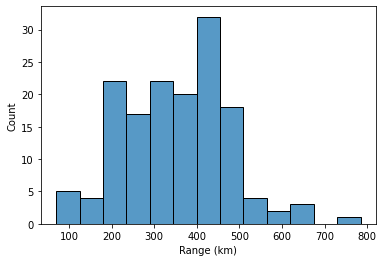

In [19]:
sns.histplot(df['Range (km)'])

<AxesSubplot:xlabel='Battery Capacity (kW)', ylabel='Count'>

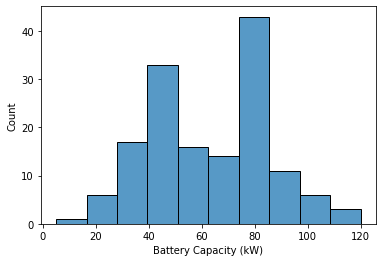

In [20]:
sns.histplot(df['Battery Capacity (kW)'])

<AxesSubplot:xlabel='Vehicle Consumption (Wh)', ylabel='Count'>

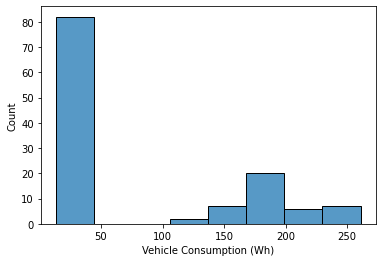

In [21]:
sns.histplot(df['Vehicle Consumption (Wh)'])

<AxesSubplot:xlabel='Main Price', ylabel='Count'>

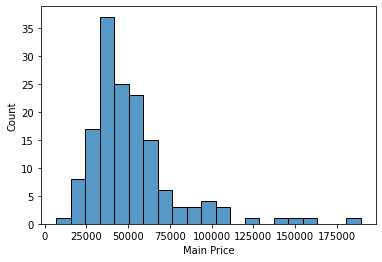

In [22]:
sns.histplot(df['Main Price'])

In [23]:
sheet_id = '1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing'
    
title_tax = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv", on_bad_lines='skip',header=0)

In [24]:
title_tax.columns


Index(['<!DOCTYPE html><html lang="fr-FR"><head><script nonce="o1FJv3XNgfMBygkQDkt5TA">var DOCS_timing={}; DOCS_timing['pls']=new Date().getTime();</script><meta property="og:title" content="Title Taxe CV"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing/export?format%3Dcsv&amp;usp=embed_facebook"><meta property="og:image" content="https://lh4.googleusercontent.com/kBVZHSRxG164H7VoJAWIHg0p75kE_B0WRWZw6tQBLpDG4J077Sy04KUxR5moTH6-KGQrbS0IK8NVRA=w1200-h630-p"><meta property="og:image:width" content="1200"><meta property="og:image:height" content="630"><meta property="og:description" content="Title taxes'], dtype='object')

In [25]:
title_tax

,,,"<!DOCTYPE html><html lang=""fr-FR""><head><script nonce=""o1FJv3XNgfMBygkQDkt5TA"">var DOCS_timing={}; DOCS_timing['pls']=new Date().getTime();</script><meta property=""og:title"" content=""Title Taxe CV""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing/export?format%3Dcsv&amp;usp=embed_facebook""><meta property=""og:image"" content=""https://lh4.googleusercontent.com/kBVZHSRxG164H7VoJAWIHg0p75kE_B0WRWZw6tQBLpDG4J077Sy04KUxR5moTH6-KGQrbS0IK8NVRA=w1200-h630-p""><meta property=""og:image:width"" content=""1200""><meta property=""og:image:height"" content=""630""><meta property=""og:description"" content=""Title taxes"
Region,Title Cost (€ / CV),Exonaration EV,Exoneration Hybrid
Alsace,42,100%,50%
Champagne-Ardenne,42,100%,100%
Lorraine,42,100%,50%
Aquitaine,41,100%,100%
...,...,...,...
}catch(e){_._DumpException(e)},NaN,NaN,NaN
try{,NaN,NaN,NaN
}catch(e){_._DumpException(e)},NaN,NaN,NaN
})(this.gbar_);,NaN,NaN,NaN


In [30]:
title_tax.iloc[3]

<!DOCTYPE html><html lang="fr-FR"><head><script nonce="o1FJv3XNgfMBygkQDkt5TA">var DOCS_timing={}; DOCS_timing['pls']=new Date().getTime();</script><meta property="og:title" content="Title Taxe CV"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing/export?format%3Dcsv&amp;usp=embed_facebook"><meta property="og:image" content="https://lh4.googleusercontent.com/kBVZHSRxG164H7VoJAWIHg0p75kE_B0WRWZw6tQBLpDG4J077Sy04KUxR5moTH6-KGQrbS0IK8NVRA=w1200-h630-p"><meta property="og:image:width" content="1200"><meta property="og:image:height" content="630"><meta property="og:description" content="Title taxes    50%
Name: (Lorraine, 42, 100%), dtype: object